In [514]:
# !pip install seaborn
#!pip install pandas_profiling

In [515]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [516]:
df = pd.read_csv("part1.csv")

C:\Users\agustin\AppData\Local\Temp\ipykernel_30456\186512045.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("part1.csv")


In [517]:
df.columns

Index(['id', 'Casos', 'campana', 'extra_crea', 'provincia', 'departamento',
       'localidad', 'establecimiento', 'lote', 'tenencia', 'cultivo',
       'subgrupo', 'primera_segunda', 'temprano_tardio', 'sup_sembrada',
       'sup_cosechada', 'destino', 'rendimiento_sup_cosechada', 'produccion',
       'antecesor', 'semillero', 'genetica', 'version_biotecnologica', 'ciclo',
       'fecha_siembra', 'decanato_fecha_siembra', 'densidad_sem_m2',
       'densidad_sem_ha', 'densidad_kg_ha', 'poblacion_pl_ha',
       'distancia_hileras', 'sistema_siembra', 'sistema_labranza', 'resiembra',
       'causa_resiembra', 'fecha_cosecha', 'humedad_cosecha', 'materia_grasa',
       'rendimiento_neto_girasol', 'proteina', 'gluten', 'peso_hectolitrico',
       'Peso_1000', 'agua_inicio', 'profundidad_medicion_au',
       'influencia_napa', 'profundidad_napa_siembra', 'riego', 'sistema_riego',
       'lamina_riego', 'calidad_ambiente', 'clasificacion_ambiente_regional',
       'capacidad_uso', 'tipo_suel

# Limpieza

In [518]:
from pandas_profiling import ProfileReport


profile = ProfileReport(df, minimal=True)
profile.to_file(output_file="Profiling_report.html")

PydanticImportError: `BaseSettings` has been moved to the `pydantic-settings` package. See https://docs.pydantic.dev/2.7/migration/#basesettings-has-moved-to-pydantic-settings for more details.

For further information visit https://errors.pydantic.dev/2.7/u/import-error

In [519]:
cols = list(df.columns)
mas80 = []
menos80 = []
for col in cols:
    if (df[col].isna().sum() / len(df) > 0.80):
        mas80.append(col)
    else:
        menos80.append(col)

print(f"Cantidad de columnas con mas de 80% de nulls {len(mas80)}")
print(f"Cantidad de columnas con menos de 80% de nulls {len(menos80)}")

Cantidad de columnas con mas de 80% de nulls 22
Cantidad de columnas con menos de 80% de nulls 75


In [520]:
df.drop(mas80, axis=1, inplace=True)

In [521]:
cols = list(df.columns)
mas50 = []
menos50 = []
for col in cols:
    if (df[col].isna().sum() / len(df) > 0.50):
        mas50.append(col)
    else:
        menos50.append(col)

print(f"Cantidad de columnas con mas de 50% de nulls {len(mas50)}")
print(f"Cantidad de columnas con menos de 50% de nulls {len(menos50)}")

Cantidad de columnas con mas de 50% de nulls 28
Cantidad de columnas con menos de 50% de nulls 47


In [522]:
menos50

['id',
 'Casos',
 'extra_crea',
 'provincia',
 'departamento',
 'localidad',
 'establecimiento',
 'lote',
 'tenencia',
 'cultivo',
 'subgrupo',
 'primera_segunda',
 'sup_sembrada',
 'sup_cosechada',
 'destino',
 'rendimiento_sup_cosechada',
 'produccion',
 'antecesor',
 'semillero',
 'genetica',
 'version_biotecnologica',
 'fecha_siembra',
 'decanato_fecha_siembra',
 'densidad_sem_m2',
 'densidad_sem_ha',
 'distancia_hileras',
 'sistema_siembra',
 'sistema_labranza',
 'resiembra',
 'fecha_cosecha',
 'influencia_napa',
 'riego',
 'calidad_ambiente',
 'clasificacion_ambiente_regional',
 'materia_organica_porc',
 'ph',
 'fosforo_0_20',
 'nitrogeno_no3_0_20',
 'pp_sep',
 'pp_oct',
 'pp_nov',
 'pp_dic',
 'pp_ene',
 'pp_feb',
 'pp_mar',
 'pp_campana',
 'fertilizacion']

In [523]:
n_df = df[menos80]

In [524]:
n_df.columns

Index(['id', 'Casos', 'extra_crea', 'provincia', 'departamento', 'localidad',
       'establecimiento', 'lote', 'tenencia', 'cultivo', 'subgrupo',
       'primera_segunda', 'temprano_tardio', 'sup_sembrada', 'sup_cosechada',
       'destino', 'rendimiento_sup_cosechada', 'produccion', 'antecesor',
       'semillero', 'genetica', 'version_biotecnologica', 'ciclo',
       'fecha_siembra', 'decanato_fecha_siembra', 'densidad_sem_m2',
       'densidad_sem_ha', 'densidad_kg_ha', 'poblacion_pl_ha',
       'distancia_hileras', 'sistema_siembra', 'sistema_labranza', 'resiembra',
       'fecha_cosecha', 'influencia_napa', 'riego', 'calidad_ambiente',
       'clasificacion_ambiente_regional', 'capacidad_uso', 'sistematizado',
       'ambiente_salino', 'nivel_informacion', 'arena', 'limo', 'arcilla',
       'materia_organica_porc', 'ph', 'azufre_ppm', 'fosforo_0_20',
       'nitrogeno_no3_0_20', 'nitrogeno_no3_20_40', 'nitrogeno_no3_40_60',
       'pp_abr', 'pp_may', 'pp_jun', 'pp_jul', 'pp_ago',

In [525]:
# Deprecated

precip_columns = ['pp_abr', 'pp_may', 'pp_jun', 'pp_jul', 'pp_ago', 'pp_sep', 
                  'pp_oct', 'pp_nov', 'pp_dic', 'pp_ene', 'pp_feb', 'pp_mar', 
                  'pp_abr_2', 'pp_may_2', 'pp_jun_2', 'pp_jul_2', 'pp_ago_2', 
                  'pp_sep_2', 'pp_oct_2', 'pp_nov_2', 'pp_dic_2']
# 
# # Create the new variable and calculate the sum
# n_df['pp'] = n_df[precip_columns].sum(axis=1) # cambiar esto por la media por departamento
# n_df.drop(columns=precip_columns, inplace=True)

In [526]:
n_df.drop(columns=precip_columns, inplace=True)


In [527]:
n_df.describe()

,id,Casos,sup_sembrada,sup_cosechada,rendimiento_sup_cosechada,produccion,densidad_sem_m2,densidad_sem_ha,densidad_kg_ha,poblacion_pl_ha,...,limo,arcilla,materia_organica_porc,ph,azufre_ppm,fosforo_0_20,nitrogeno_no3_0_20,nitrogeno_no3_20_40,nitrogeno_no3_40_60,pp_campana
count,9900.000000,9661.000000,9887.000000,9636.000000,9547.000000,9547.000000,5878.000000,5.885000e+03,4052.000000,3895.000000,...,2294.000000,2208.000000,9900.000000,5425.000000,2843.000000,9236.000000,6421.000000,4540.000000,3712.000000,5300.000000
mean,265666.934949,18310.465790,64.566365,63.610197,5503.964557,335.052597,130.185253,1.299612e+06,124.306670,229.762296,...,0.205189,0.215807,0.027452,6.340498,10.941651,15.101489,19.188022,11.045914,8.781499,773.331509
std,128821.902291,21208.396086,62.802584,63.067650,5519.360997,421.972418,156.853532,1.568706e+06,39.030752,2381.638439,...,0.106412,0.346679,0.011674,0.556094,21.522588,10.712623,20.996067,12.396972,10.488291,266.355649
min,5951.000000,1.000000,0.290000,0.000000,0.000000,0.000000,2.361900,0.000000e+00,3.000000,2.600000,...,0.000000,0.000000,0.003600,2.570000,0.000000,0.060794,0.028700,0.100000,0.100000,0.000000
25%,157178.750000,283.000000,28.000000,27.000000,2829.000000,97.682500,6.539000,6.539000e+04,105.000000,6.600000,...,0.130000,0.100000,0.019600,6.000000,4.100000,8.633333,7.780000,4.200000,3.000000,601.000000
50%,306416.500000,4486.000000,50.000000,49.000000,4210.000000,204.946800,34.387500,3.400000e+05,130.000000,100.000000,...,0.197959,0.186000,0.025100,6.290000,6.800000,12.350000,11.972700,6.600000,5.000000,763.000000
75%,368405.250000,37998.000000,80.000000,79.107500,6500.000000,410.352000,300.000000,3.000000e+06,149.520000,280.000000,...,0.259000,0.260000,0.033000,6.670000,11.935000,18.100000,20.800000,12.300000,9.900000,936.000000
max,421838.000000,67493.000000,2112.300000,2112.300000,77259.000000,7640.907282,835.000000,8.350000e+06,350.000000,72000.000000,...,0.800000,15.000000,0.099426,9.200000,737.000000,122.480000,396.000000,161.000000,102.000000,1961.000000


In [528]:
counts = n_df.isnull().sum()
counts.reset_index().sort_values(by = 0 , ascending = False)

,index,0
44,arcilla,7692
43,limo,7606
12,temprano_tardio,7082
47,azufre_ppm,7057
42,arena,6697
39,sistematizado,6555
51,nitrogeno_no3_40_60,6188
41,nivel_informacion,6082
38,capacidad_uso,6072
28,poblacion_pl_ha,6005


#### Variables que no se tocan

     menos de 10% de nulls
     id', 'Casos', 'extra_crea', 'provincia', 'departamento', 'localidad'
     fosforo, sup_cosechada, distancia_hileras, fertilizacion, decanto_fecha_siembra, calidad hambiente
     tenenncia, subgrupo, sup_sembrada, genetica, semillero, riego, cultuivo
    
### Variables a analizar

    mas de 10% pero menos de 50% de nulls
    ph, version_biotecnologica, resiembra, densidad_sem_m2, densida_sem_ha, primera_segunda, 
    sisitema_siembra, fecha_cosecha, nitrogeno, extra_crea, influencia_napa
    
### variables con muy pocos registros

    mas de 50% pero menos de 80% de nulls
    sistema_labranza, pp_campana, claficiacion_ambiental, ciclo, nitrogeno, denisdad_kg_ha, ambiente_salino,
    arcilla, limo, temprano_tardio, azufre_ppm, arena, sistematizado, nitrogenoi, nievel_informacion,
    capacidad_uso, poblacion_pl_ha
    

  las de nitrogeno si no aparece poner no detectable
    

In [529]:
df.columns

Index(['id', 'Casos', 'extra_crea', 'provincia', 'departamento', 'localidad',
       'establecimiento', 'lote', 'tenencia', 'cultivo', 'subgrupo',
       'primera_segunda', 'temprano_tardio', 'sup_sembrada', 'sup_cosechada',
       'destino', 'rendimiento_sup_cosechada', 'produccion', 'antecesor',
       'semillero', 'genetica', 'version_biotecnologica', 'ciclo',
       'fecha_siembra', 'decanato_fecha_siembra', 'densidad_sem_m2',
       'densidad_sem_ha', 'densidad_kg_ha', 'poblacion_pl_ha',
       'distancia_hileras', 'sistema_siembra', 'sistema_labranza', 'resiembra',
       'fecha_cosecha', 'influencia_napa', 'riego', 'calidad_ambiente',
       'clasificacion_ambiente_regional', 'capacidad_uso', 'sistematizado',
       'ambiente_salino', 'nivel_informacion', 'arena', 'limo', 'arcilla',
       'materia_organica_porc', 'ph', 'azufre_ppm', 'fosforo_0_20',
       'nitrogeno_no3_0_20', 'nitrogeno_no3_20_40', 'nitrogeno_no3_40_60',
       'pp_abr', 'pp_may', 'pp_jun', 'pp_jul', 'pp_ago',

In [530]:
n_df["ph"].describe()

# como tiene una media de 6.34 y un desvio de 0.5 se procede a remplazar los valores nulos por la media de la provinicia

count    5425.000000
mean        6.340498
std         0.556094
min         2.570000
25%         6.000000
50%         6.290000
75%         6.670000
max         9.200000
Name: ph, dtype: float64

In [531]:
ph_suelo = n_df.groupby(["localidad"])["ph"].mean().reset_index().sort_values(by = "ph", ascending = False)
ph_suelo = ph_suelo.rename(columns={"ph": "ph_localidad"})

n_df = pd.merge(n_df, ph_suelo, on="localidad", how="left")
n_df["ph"] = np.where(n_df["ph"].isnull(), n_df["ph_localidad"], n_df["ph"] )
n_df.drop(columns=["ph_localidad"], inplace=True)


In [532]:
# si la varible resiembra esta vacia se asume como negativo

n_df["resiembra"] = n_df["resiembra"].fillna("no")

In [533]:
# si la varible extra_crea esta vacia se asume como negativo

n_df["extra_crea"] = n_df["extra_crea"].fillna("no")

In [534]:
n_df.sort_values(by = "id", ascending = False)
n_df["fecha_cosecha"].fillna(method="ffill", inplace=True)

C:\Users\agustin\AppData\Local\Temp\ipykernel_30456\1255962682.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n_df["fecha_cosecha"].fillna(method="ffill", inplace=True)
C:\Users\agustin\AppData\Local\Temp\ipykernel_30456\1255962682.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  n_df["fecha_cosecha"].fillna(method="ffill", inplace=True)


In [535]:
n_df["primera_segunda"].unique() # entender antes de remplazar

array(['1deg', nan, '2deg'], dtype=object)

In [536]:
n_df["densidad_sem_m2"].describe()

dens_prov = n_df.groupby(["provincia"])["densidad_sem_m2"].agg(["mean", "std"]).reset_index()
dens_prov = dens_prov.rename(columns={"mean": "densidad_sem_m2_mean", "std": "densidad_sem_m2_std"})
dens_prov = dens_prov.sort_values(by="densidad_sem_m2_mean", ascending=False)
dens_prov

,provincia,densidad_sem_m2_mean,densidad_sem_m2_std
4,corrientes,340.000000,0.000000
5,entre.rios,178.809712,188.399530
10,santa.fe,177.788833,161.381962
0,buenos.aires,135.579076,150.418546
6,la.pampa,89.599232,109.155291
3,cordoba,83.162456,134.184086
1,catamarca,29.000000,4.592484
2,chaco,28.000000,NaN
12,tucuman,26.686275,6.322943
8,salta,25.100000,4.748099


In [537]:
napa_agrup = n_df.groupby(["lote", "influencia_napa"])["id"].count()
napa_agrup

lote                  influencia_napa
00397d99acc92ad006b2  no                 1
004a410340a3e38edb9e  no                 6
                      si                 6
009f18b405fda66052c1  no                 1
00a8300b11ada4a6a382  si                 1
                                        ..
ff623cc3f1ae3d1ee224  si                 6
ff9054796ddc4b14888c  no                 2
ffab73d67629800478a9  no                 1
ffb6ffce5d356b84b2e0  no                 4
                      si                 6
Name: id, Length: 2511, dtype: int64

In [538]:
n_df['influencia_napa'] = n_df.groupby('lote')['influencia_napa'].transform(lambda x: 
                                x.fillna('si') if 'si' in x.values else 
                                x.fillna('no') if 'no' in x.values else 
                                'no')

In [539]:
df["sistema_siembra"].unique()

array([nan, 'chorrillo', 'placa', 'neumatico', 'neumatico dosis fija',
       'placa dosis fija', 'chorrillo dosis fija',
       'neumatico dosis variable', 'chorrillo dosis variable',
       'voleadora', 'placa dosis variable', 'otro', 'avion', 'manual',
       'mecanica'], dtype=object)

In [540]:
df["sistema_siembra"].describe()

sist_siemb = n_df.groupby(["sistema_siembra", "localidad"])["id"].count()
sist_siemb

sistema_siembra       localidad           
avion                 huanchillas              2
                      jesus maria              2
chorrillo             25 de mayo               8
                      alberti                  6
                      alcaraz                 10
                                              ..
placa dosis variable  rincon de nogoya         2
                      victoria                 1
                      villa urquiza            1
voleadora             calchin                  1
                      san miguel del monte     1
Name: id, Length: 799, dtype: int64

In [541]:
modas_por_localidad = n_df.groupby('localidad')['sistema_siembra'].apply(lambda x: x.mode()[0] if not x.dropna().empty else 'Valor_por_defecto')
n_df['sistema_siembra'] = n_df.apply(lambda row: modas_por_localidad[row['localidad']] if pd.isnull(row['sistema_siembra']) else row['sistema_siembra'], axis=1)


In [542]:
n_df.groupby(["version_biotecnologica"])["id"].count().reset_index().sort_values(by="id", ascending = False)


,version_biotecnologica,id
19,no bt,1830
36,vt3p,893
2,cl,398
0,bt,275
37,vt3p / rib,275
18,mgrr2,202
34,viptera 3,186
17,mgrr,175
40,vyhr,160
28,sin evento,158


In [543]:
n_df["cultivo"].unique()

array(['maiz', 'trigo', 'girasol', 'cebada', 'soja', 'centeno',
       'triticale', 'avena', 'vicia', 'alpiste', 'arveja', 'tricepiro',
       'sorgo', 'multiespecies anuales', 'garbanzo', 'poroto', 'colza',
       'carinata', 'lino', 'rabanito', 'mani', 'arroz', 'lenteja',
       'cana de azucar'], dtype=object)

In [544]:
n_df["version_biotecnologica"] = np.where((n_df["version_biotecnologica"].isnull()) & (n_df["cultivo"] != "maiz") & (n_df["cultivo"] != "girasol"), "No aplica", "no bt") 

# version biotecnologica solo aplica para miaz y trigo

In [545]:
n_df["densidad_sem_m2"] = np.where(n_df["densidad_sem_m2"].isnull(), n_df["densidad_sem_ha"] * 10000, n_df["densidad_sem_m2"] )


In [546]:
dens_prob_lote = n_df.groupby(['lote', 'densidad_sem_m2']).agg({'densidad_sem_m2': ['mean', 'std'], 'id': 'count'}).reset_index()
dens_prob_lote.columns = ['lote', 'densidad_sem_m2', 'media_densidad_sem_m2', 'desvio_densidad_sem_m2', 'count']
dens_prob_lote.sort_values(by='count', ascending=False)


,lote,densidad_sem_m2,media_densidad_sem_m2,desvio_densidad_sem_m2,count
3199,c4ca4238a0b923820dcc,300.000000,300.000000,0.0,45
3225,c4ca4238a0b923820dcc,360.000000,360.000000,0.0,29
3224,c4ca4238a0b923820dcc,350.000000,350.000000,0.0,27
3209,c4ca4238a0b923820dcc,320.000000,320.000000,0.0,23
3516,c81e728d9d4c2f636f06,350.000000,350.000000,0.0,20
...,...,...,...,...,...
1605,6f61a9564176bae28e0c,130.000000,130.000000,NaN,1
1606,6f7603d4ec10af55e3cd,4.000000,4.000000,NaN,1
1607,6fff4ba8f2cde17994e1,290.000000,290.000000,NaN,1
1609,70359930af6abc76f0d0,6.660000,6.660000,NaN,1


In [547]:
n_df["densidad_sem_m2"].describe() # cantidad de plantas que se siembran en un área específica

dens_prob = n_df.groupby('lote')['densidad_sem_m2'].apply(lambda x: x.mean())

# Reemplaza los valores nulos por la densidad promedio correspondiente a cada lote
n_df['densidad_sem_m2'] = n_df.apply(lambda row: dens_prob[row['lote']] if pd.isnull(row['densidad_sem_m2']) else row['densidad_sem_m2'], axis=1)


In [548]:
n_df['densidad_sem_m2'].isnull().sum()


# quedan nulos a priori porque no hay suficiente informacion para remplazarlos
# vamos a usar modelos que acepten nulos

1131

In [549]:
# vuelo densidad_sem_ha y solo me quedo con densidad sem m2

n_df.drop(["densidad_sem_ha"], inplace=True, axis=1)


In [550]:
n_df["nivel_informacion"].unique()

n_df.drop("nivel_informacion", inplace=True, axis=1)

In [551]:
n_df.groupby([ "sistema_labranza"])["id"].count().reset_index().sort_values(by="id", ascending = False)


# es muy grande la diferencia entre la cuenta de siembra diercta y el resto. se procede a remplazar los nulos por siembra directa

,sistema_labranza,id
3,siembra directa,5113
1,convencional,142
2,minima,69
0,aerea,7
4,voleo,2


In [552]:
n_df["sistema_labranza"] = np.where(n_df["sistema_labranza"].isnull(), "siembra directa", n_df["sistema_labranza"])

In [553]:
n_df.groupby([ "sistematizado"])["id"].count().reset_index().sort_values(by="id", ascending = False)

# cambio nulos por no sistematizado, dos razones: es la moda + no podemos asumir tecnologia sin estar seguros

,sistematizado,id
0,no sistematizado,2734
4,terrazas sembrables,230
3,terrazas no sembrables,182
1,otro,119
2,sistematizado,80


In [554]:
n_df["pp_campana"].describe()

n_df["pp_campana"].isnull().sum() # 50% de nulls 

4600

In [555]:
n_df.columns

Index(['id', 'Casos', 'extra_crea', 'provincia', 'departamento', 'localidad',
       'establecimiento', 'lote', 'tenencia', 'cultivo', 'subgrupo',
       'primera_segunda', 'temprano_tardio', 'sup_sembrada', 'sup_cosechada',
       'destino', 'rendimiento_sup_cosechada', 'produccion', 'antecesor',
       'semillero', 'genetica', 'version_biotecnologica', 'ciclo',
       'fecha_siembra', 'decanato_fecha_siembra', 'densidad_sem_m2',
       'densidad_kg_ha', 'poblacion_pl_ha', 'distancia_hileras',
       'sistema_siembra', 'sistema_labranza', 'resiembra', 'fecha_cosecha',
       'influencia_napa', 'riego', 'calidad_ambiente',
       'clasificacion_ambiente_regional', 'capacidad_uso', 'sistematizado',
       'ambiente_salino', 'arena', 'limo', 'arcilla', 'materia_organica_porc',
       'ph', 'azufre_ppm', 'fosforo_0_20', 'nitrogeno_no3_0_20',
       'nitrogeno_no3_20_40', 'nitrogeno_no3_40_60', 'pp_campana',
       'fertilizacion'],
      dtype='object')

In [556]:
n_df.groupby(["localidad", "pp_campana"])["id"].count().reset_index().sort_values(by="id", ascending = False)

# LOGICA
# Para los valores nulos de pp_camapa quiero remplazarlos por la media de pp_campana parala misma fecha de siembra y fecha de cosecha en la misma localidad


n_df['fecha_siembra'] = pd.to_datetime(n_df['fecha_siembra'])
n_df['fecha_cosecha'] = pd.to_datetime(n_df['fecha_cosecha'])

n_df['duracion_campaña'] = n_df['fecha_cosecha'] - n_df['fecha_siembra']

df['pp_campana'] = df.groupby(['localidad', 'fecha_siembra', 'fecha_cosecha'])['pp_campana'].transform(lambda x: x.fillna(x.mean()) if x.isnull().any() else x)

n_df['fecha_siembra'] = n_df['fecha_siembra'].fillna('')
n_df['fecha_cosecha'] = n_df['fecha_cosecha'].fillna('')

# no se pudieron resolver los nulos, se van a eliminar las columnas y cuando se consiga un dataset de precipitaciones se hara un data augmentation


In [557]:
n_df[['pp_campana','fecha_siembra', 'fecha_cosecha', "duracion_campaña"]]


,pp_campana,fecha_siembra,fecha_cosecha,duracion_campaña
0,1238.0,NaT,NaT,NaT
1,1064.0,NaT,NaT,NaT
2,NaN,2007-06-05,2007-12-19,197 days
3,NaN,2007-06-12,2007-12-20,191 days
4,NaN,2007-06-07,2007-12-13,189 days
...,...,...,...,...
9895,628.0,2023-06-12,2022-11-26,-198 days
9896,597.0,2023-06-21,2022-11-21,-212 days
9897,597.0,2023-06-18,2022-11-24,-206 days
9898,597.0,2023-06-17,2022-11-25,-204 days


In [558]:
df.drop("pp_campana", inplace=True, axis=1)

In [559]:
n_df["ciclo"].unique() # Ciclo → Clasificación por cultivo según el tiempo transcurrido desde su emergencia a madurez fisiológica.

n_df.groupby(["cultivo", "ciclo"])["id"].count().reset_index().sort_values(by = ["cultivo", 'id'], ascending = False)


,cultivo,ciclo,id
21,trigo,intermedio,1209
20,trigo,corto,497
24,trigo,largo,443
23,trigo,intermedio.largo,249
22,trigo,intermedio.corto,97
10,soja,iv largo,938
9,soja,iv corto,497
8,soja,iii largo,270
12,soja,v corto,130
15,soja,vi corto,70


In [560]:
ciclo_mas_repetido = {
    "trigo": "intermedio",
    "soja": "iv largo",
    "maiz": "largo",
    "girasol": "largo",
    "cebada": "intermedio"
}

n_df["ciclo"] = n_df["ciclo"].fillna(n_df["cultivo"].map(ciclo_mas_repetido))

In [561]:
n_df["temprano_tardio"].isnull().sum()  #7082 nulls
n_df.groupby(["temprano_tardio"])["id"].count().reset_index().sort_values(by = "id", ascending=False) # si no es maiz poner no aplica


,temprano_tardio,id
1,temprano,1912
0,tardio,906


In [562]:

n_df["temprano_tardio"] = np.where((n_df["temprano_tardio"].isnull()) & (n_df["cultivo"] != "maiz"), "No aplica", "temprano") 

In [563]:

n_df["capacidad_uso"].isnull().sum()  #6072 nulls
n_df["capacidad_uso"].unique() 

n_df.groupby(["capacidad_uso"])["id"].count().reset_index().sort_values(by="id", ascending = False)

,capacidad_uso,id
1,ii,2162
2,iii,894
0,i,577
3,iv,134
6,vi,47
5,v,12
4,p tosca norte,2


In [564]:
n_df["poblacion_pl_ha"].describe() #poblacion plantas por ha

promedio_localidad = n_df.groupby('localidad')['poblacion_pl_ha'].mean()
promedio_lote = n_df.groupby('lote')['poblacion_pl_ha'].mean()

# Función para obtener el promedio específico del lote o de la localidad según el caso
def obtener_promedio(row):
    if pd.isnull(row['poblacion_pl_ha']):
        lote = row['lote']
        if lote in promedio_lote:
            return promedio_lote[lote]
        else:
            return promedio_localidad[row['localidad']]
    else:
        return row['poblacion_pl_ha']

# Aplicar la función para reemplazar los valores nulos en poblacion_pl_ha
n_df["poblacion_pl_ha"] = n_df.apply(obtener_promedio, axis=1)


In [565]:
# n_df["nitrogeno_no3_0_20"].fillna("no detectable")
# n_df["nitrogeno_no3_20_40"].fillna("no detectable")
# n_df["nitrogeno_no3_40_60"].fillna("no detectable")

In [566]:
(n_df["provincia"].unique())

array(['buenos.aires', 'cordoba', 'entre.rios', 'san.luis', 'la.pampa',
       'santiago.del.estero', 'salta', 'tucuman', 'santa.fe', 'chaco',
       'corrientes', 'mendoza', 'catamarca'], dtype=object)

In [567]:
n_df["ambiente_salino"].unique() # si el suelo tiene salinidad --> voy a usar la moda de la zona para si o no

amb_sal = n_df.groupby(["localidad", "ambiente_salino"])["id"].count().reset_index().sort_values(by="provincia", ascending = True)
amb_sal.rename(columns={"id": "count"}, inplace=True)

amb_sal_max = amb_sal.groupby("localidad").first().reset_index()
n_df = pd.merge(n_df, amb_sal_max, on="localidad", suffixes=('_original', '_max'))
n_df["ambiente_salino"] = np.where(n_df["ambiente_salino_original"].isnull(), n_df["ambiente_salino_max"], n_df["ambiente_salino_original"])
n_df.drop("ambiente_salino_max", inplace = True, axis = 1)


KeyError: 'provincia'

In [ ]:
n_df.drop(["densidad_kg_ha"], inplace = True, axis = 1) # se elimina porque ya hay una variable que explica lo mismo con nas rempleazados

In [568]:
n_df["azufre_ppm"].isnull().sum() # se elimina la variable ya que tiene muchos nuls y no se puede suponer la aplicacion de tecnologia y productos aplicados con certeza

#n_df.drop(["azufre_ppm"], inplace=True, axis = 1)

7057

In [569]:
n_df[["arcilla", "limo", "arena"]]

#n_df["materiales_en_suelo"] = n_df[["arcilla", "limo", "arena"]].sum(axis=1) 

,arcilla,limo,arena
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN
...,...,...,...
9895,NaN,NaN,NaN
9896,NaN,NaN,NaN
9897,NaN,NaN,NaN
9898,NaN,NaN,NaN


In [570]:
n_df.groupby(["provincia", "capacidad_uso"])["id"].count().reset_index().sort_values(by = ["provincia","id"], ascending =  False)


# ver q hacer con esta

,provincia,capacidad_uso,id
20,santa.fe,i,270
21,santa.fe,ii,113
22,santa.fe,iii,43
23,santa.fe,iv,28
24,santa.fe,v,1
14,la.pampa,ii,110
15,la.pampa,iii,44
13,la.pampa,i,27
16,la.pampa,iv,13
18,la.pampa,v,9


In [571]:
import pandas as pd

def detect_outliers_iqr(data):
    outliers_columns = []
    for column in data.select_dtypes(include='number'):
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outlier_indices = data[(data[column] < lower_bound) | (data[column] > upper_bound)].index
        if len(outlier_indices) > 0:
            outliers_columns.append(column)
    return outliers_columns


outliers_vars = detect_outliers_iqr(n_df)
print("Variables con outliers:")
print(outliers_vars)

Variables con outliers:
['sup_sembrada', 'sup_cosechada', 'rendimiento_sup_cosechada', 'produccion', 'densidad_sem_m2', 'densidad_kg_ha', 'poblacion_pl_ha', 'distancia_hileras', 'arena', 'limo', 'arcilla', 'materia_organica_porc', 'ph', 'azufre_ppm', 'fosforo_0_20', 'nitrogeno_no3_0_20', 'nitrogeno_no3_20_40', 'nitrogeno_no3_40_60', 'pp_campana', 'duracion_campaña']


### Variables con outliers

    'sup_sembrada', 'sup_cosechada', 'rendimiento_sup_cosechada' --> datos reales, es logico el outlier, no se trata
    'produccion', 
    'densidad_sem_m2', 
    'poblacion_pl_ha',
    'distancia_hileras', 
    'arena', 'limo', 'arcilla', 
    'materia_organica_porc', 
    'ph', 'fosforo_0_20', 
    'nitrogeno_no3_0_20', 'nitrogeno_no3_20_40', 'nitrogeno_no3_40_60', 
    'pp_campana', 
    'duracion_campaña', 
    'materiales_en_suelo'

In [572]:
import matplotlib.pyplot as plt

def plot_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    data_no_outliers = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    

    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    
    plt.figure(figsize=(10, 6))
    
    plt.scatter(data_no_outliers.index, data_no_outliers[column], color='blue', label='Datos sin outliers')
    
    plt.scatter(outliers.index, outliers[column], color='red', label='Outliers')
    
    plt.title('Gráfico de Outliers para {}'.format(column))
    plt.xlabel('Índice')
    plt.ylabel(column)
    plt.legend()
    plt.show()


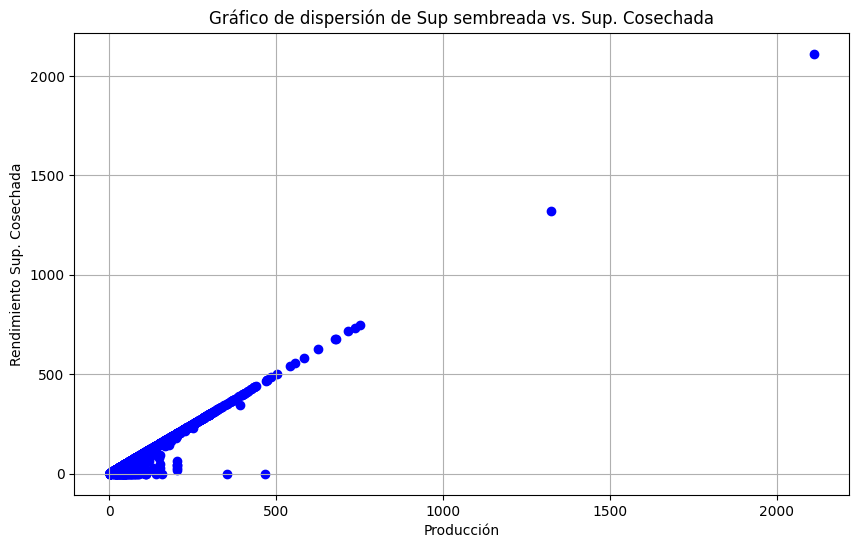

In [573]:
plt.figure(figsize=(10, 6))
plt.scatter(n_df['sup_sembrada'], n_df['sup_cosechada'], color='blue')
plt.title('Gráfico de dispersión de Sup sembreada vs. Sup. Cosechada')
plt.xlabel('Producción')
plt.ylabel('Rendimiento Sup. Cosechada')
plt.grid(True)
plt.show()

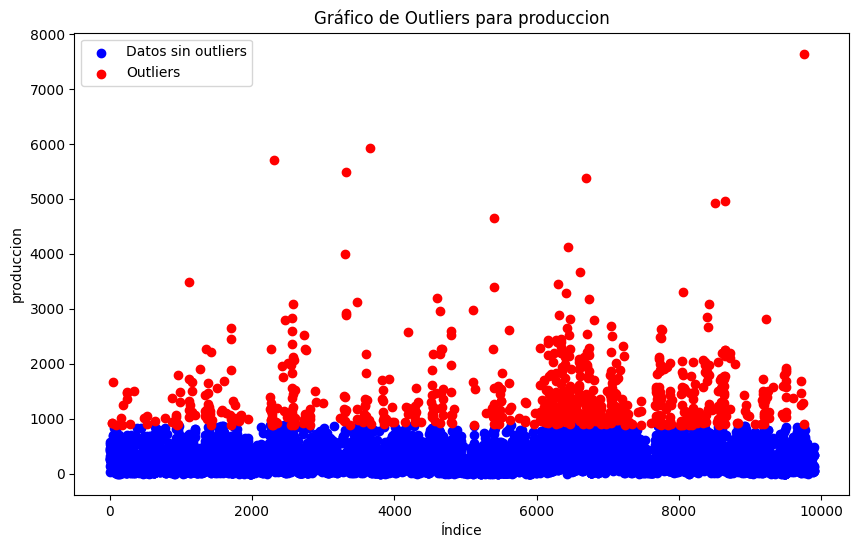

In [574]:
plot_outliers(n_df, 'produccion')


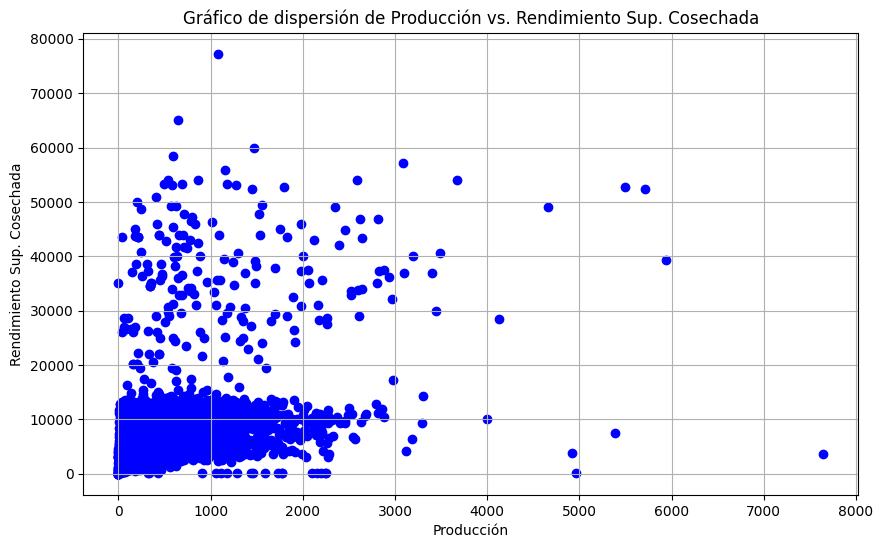

In [575]:
plt.figure(figsize=(10, 6))
plt.scatter(n_df['produccion'], n_df['rendimiento_sup_cosechada'], color='blue')
plt.title('Gráfico de dispersión de Producción vs. Rendimiento Sup. Cosechada')
plt.xlabel('Producción')
plt.ylabel('Rendimiento Sup. Cosechada')
plt.grid(True)
plt.show()

# chequear outliers aca

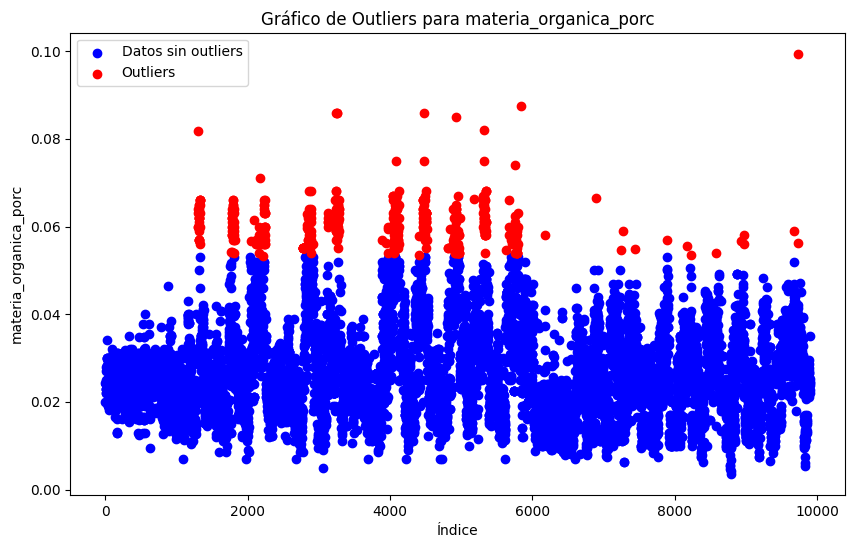

In [576]:
plot_outliers(n_df, 'materia_organica_porc')

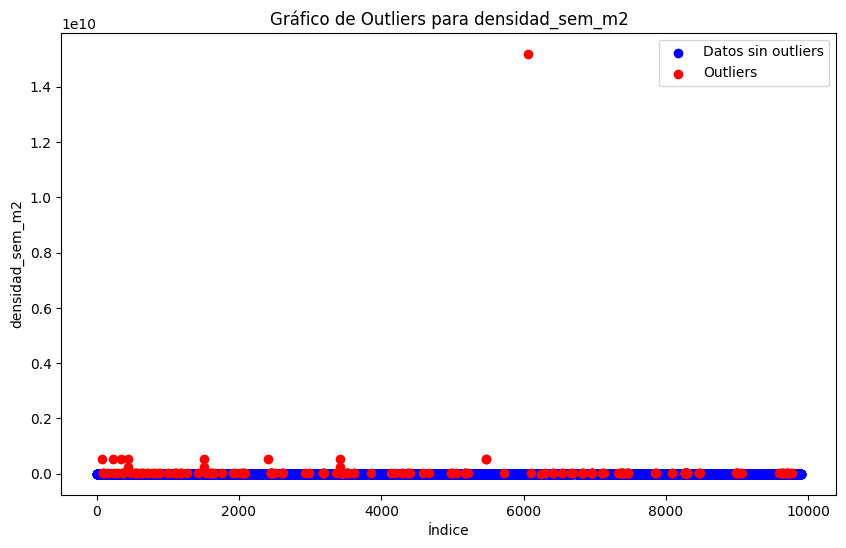

In [577]:
plot_outliers(n_df, 'densidad_sem_m2')
# muy pocos, cambiar  por mediana o media sin outliers


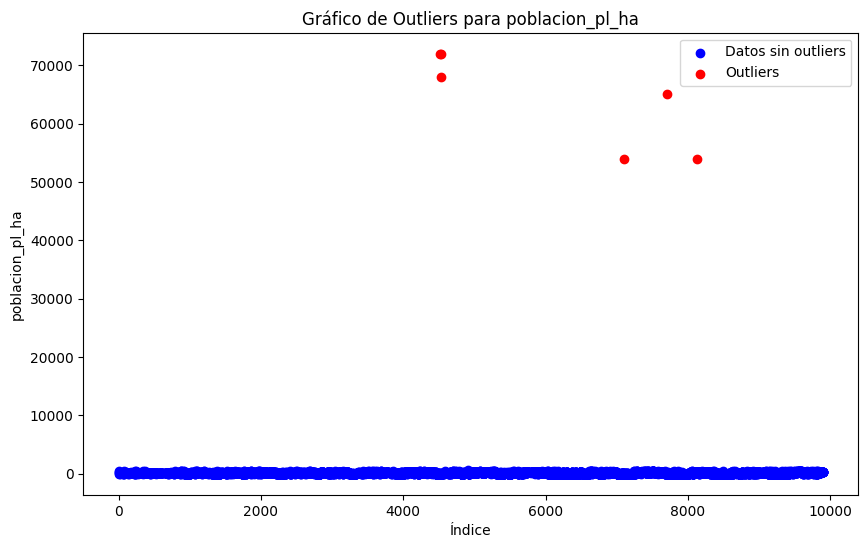

In [578]:
plot_outliers(n_df, "poblacion_pl_ha")
median = n_df['poblacion_pl_ha'].median()

# Calcular el rango intercuartílico (IQR)
Q1 = n_df['poblacion_pl_ha'].quantile(0.25)
Q3 = n_df['poblacion_pl_ha'].quantile(0.75)
IQR = Q3 - Q1

# Definir los límites para los outliers
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Reemplazar los outliers por la mediana
n_df['poblacion_pl_ha'] = n_df['poblacion_pl_ha'].apply(lambda x: median if x < lower_limit or x > upper_limit else x)
# por mediana o media sin outliers

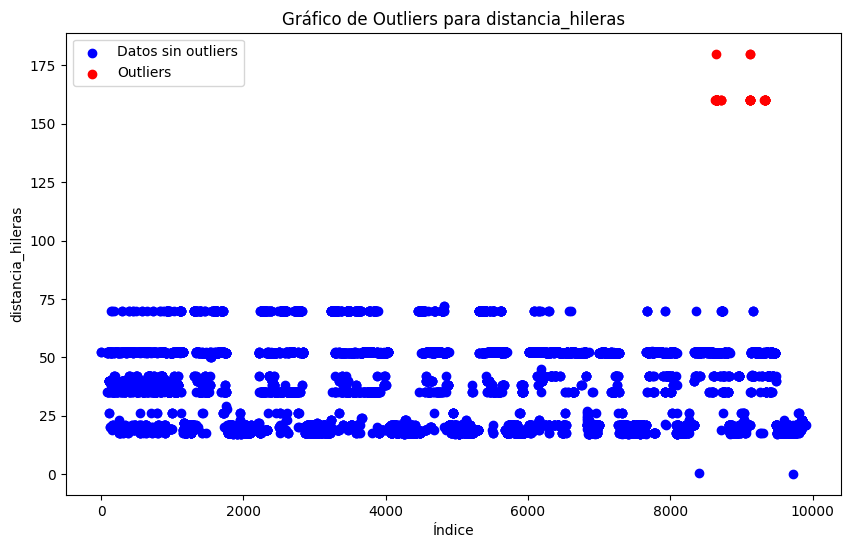

In [579]:
plot_outliers(n_df, "distancia_hileras")
median = n_df['distancia_hileras'].median()

# Calcular el rango intercuartílico (IQR)
Q1 = n_df['distancia_hileras'].quantile(0.25)
Q3 = n_df['distancia_hileras'].quantile(0.75)
IQR = Q3 - Q1

# Definir los límites para los outliers
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Reemplazar los outliers por la mediana
n_df['distancia_hileras'] = n_df['distancia_hileras'].apply(lambda x: median if x < lower_limit or x > upper_limit else x)
# por mediana o media sin outliers

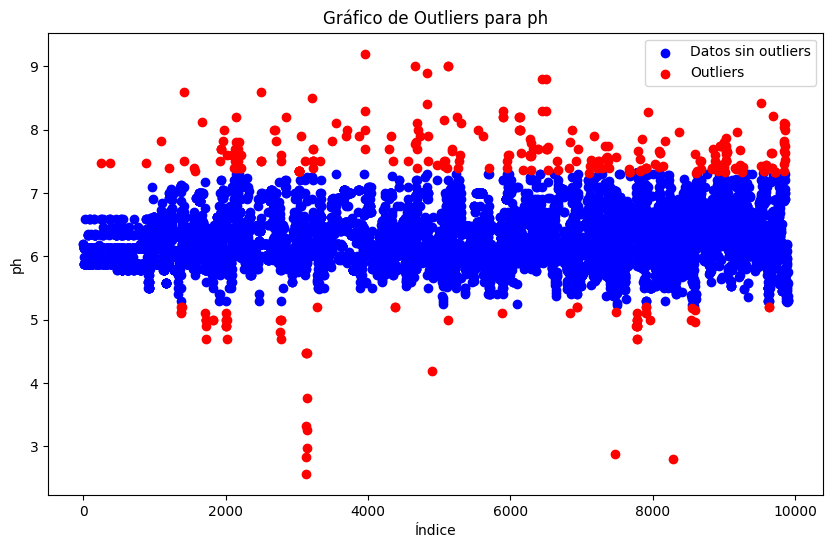

In [580]:
plot_outliers(n_df, "ph")

median = n_df['ph'].median()

# Calcular el rango intercuartílico (IQR)
Q1 = n_df['ph'].quantile(0.25)
Q3 = n_df['ph'].quantile(0.75)
IQR = Q3 - Q1

# Definir los límites para los outliers
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Reemplazar los outliers por la mediana
n_df['ph'] = n_df['ph'].apply(lambda x: median if x < lower_limit or x > upper_limit else x)

In [581]:
n_df.columns

Index(['id', 'Casos', 'extra_crea', 'provincia', 'departamento', 'localidad',
       'establecimiento', 'lote', 'tenencia', 'cultivo', 'subgrupo',
       'primera_segunda', 'temprano_tardio', 'sup_sembrada', 'sup_cosechada',
       'destino', 'rendimiento_sup_cosechada', 'produccion', 'antecesor',
       'semillero', 'genetica', 'version_biotecnologica', 'ciclo',
       'fecha_siembra', 'decanato_fecha_siembra', 'densidad_sem_m2',
       'densidad_kg_ha', 'poblacion_pl_ha', 'distancia_hileras',
       'sistema_siembra', 'sistema_labranza', 'resiembra', 'fecha_cosecha',
       'influencia_napa', 'riego', 'calidad_ambiente',
       'clasificacion_ambiente_regional', 'capacidad_uso', 'sistematizado',
       'ambiente_salino', 'arena', 'limo', 'arcilla', 'materia_organica_porc',
       'ph', 'azufre_ppm', 'fosforo_0_20', 'nitrogeno_no3_0_20',
       'nitrogeno_no3_20_40', 'nitrogeno_no3_40_60', 'pp_campana',
       'fertilizacion', 'duracion_campaña'],
      dtype='object')

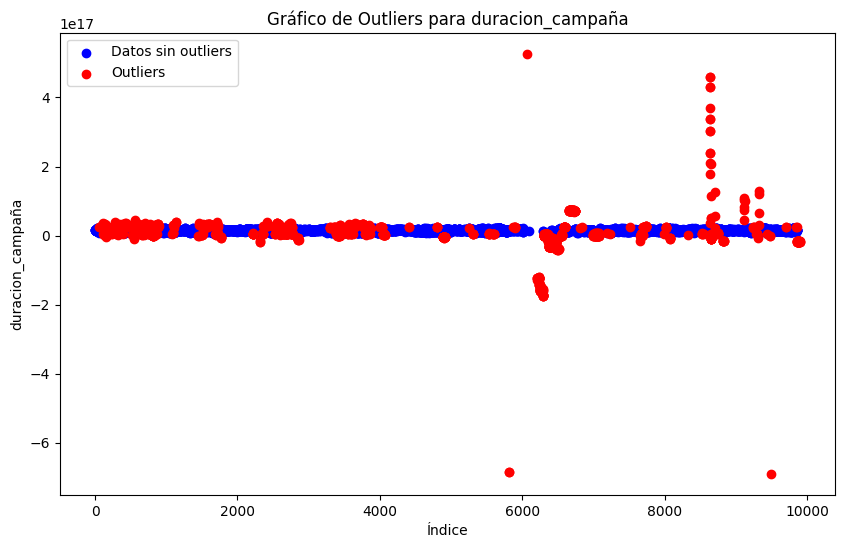

In [582]:
plot_outliers(n_df, "duracion_campaña")


median = n_df['duracion_campaña'].median()

# Calcular el rango intercuartílico (IQR)
Q1 = n_df['duracion_campaña'].quantile(0.25)
Q3 = n_df['duracion_campaña'].quantile(0.75)
IQR = Q3 - Q1

# Definir los límites para los outliers
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Reemplazar los outliers por la mediana
n_df['duracion_campaña'] = n_df['duracion_campaña'].apply(lambda x: median if x < lower_limit or x > upper_limit else x)

In [583]:

def outliers_nitr(df, var):
    median = df[var].median()
    
    # Calcular el rango intercuartílico (IQR)
    Q1 = df[var].quantile(0.25)
    Q3 = df[var].quantile(0.75)
    IQR = Q3 - Q1
    
    # Definir los límites para los outliers
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    
    # Reemplazar los outliers por la mediana
    df[var] = df[var].apply(lambda x: median if x < lower_limit or x > upper_limit else x)


outliers_nitr(n_df, "nitrogeno_no3_0_20")
outliers_nitr(n_df, "nitrogeno_no3_20_40")
outliers_nitr(n_df, "nitrogeno_no3_40_60")


# Exploracion

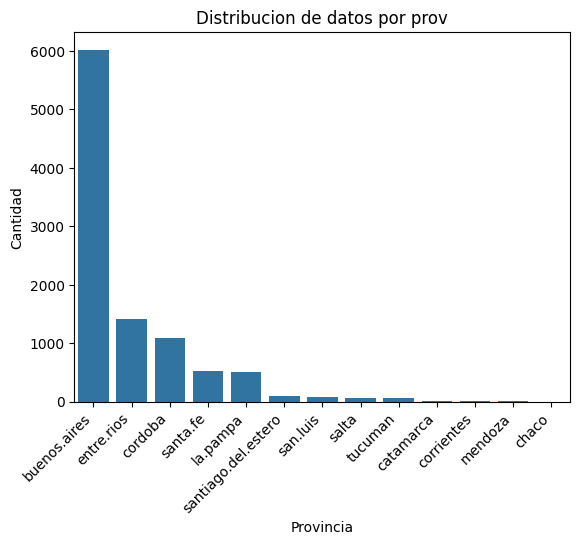

In [584]:
#extra polar para todos los datos, tambien ver cuantos datos tenemos por variable target

j = n_df.groupby(["provincia"])["id"].count()
j = j.reset_index().sort_values("id", ascending = False)
j


plt.xticks(rotation=45, ha='right')  

sns.barplot(x=j["provincia"], y=j["id"])

# Add labels and title
plt.xlabel('Provincia')
plt.ylabel('Cantidad')
plt.title('Distribucion de datos por prov')

# Show plot
plt.show()


In [585]:
cultivo_ten_prov = n_df.groupby(["provincia", "tenencia", "cultivo"])["id"].count()
cultivo_ten_prov = cultivo_ten_prov.reset_index().sort_values("id", ascending  = False)
cultivo_ten_prov = cultivo_ten_prov.reset_index().rename(columns={"id": "cuenta"})

cultivo_ten_prov 

,index,provincia,tenencia,cultivo,cuenta
0,24,buenos.aires,propio,soja,1392
1,26,buenos.aires,propio,trigo,1388
2,22,buenos.aires,propio,maiz,1357
3,19,buenos.aires,propio,cebada,431
4,21,buenos.aires,propio,girasol,430
...,...,...,...,...,...
139,103,salta,propio,poroto,1
140,102,salta,propio,maiz,1
141,78,entre.rios,propio,vicia,1
142,82,la.pampa,arrendado,centeno,1


In [586]:
ten_subgr = n_df.groupby(["tenencia", "subgrupo"])["id"].count()
ten_subgr = ten_subgr.reset_index().sort_values("id", ascending  = False)
ten_subgr = ten_subgr.reset_index().rename(columns={"id": "cuenta"})

ten_subgr 

,index,tenencia,subgrupo,cuenta
0,47,propio,tradicional,2558
1,44,propio,pan,2000
2,43,propio,ogm,1669
3,24,arrendado,tradicional,940
4,20,arrendado,pan,926
5,18,arrendado,ogm,461
6,33,propio,cervecera,368
7,9,arrendado,cervecera,170
8,29,propio,alto oleico,144
9,37,propio,forrajera,96


In [587]:

#buscar relaciones
n_df.columns

Index(['id', 'Casos', 'extra_crea', 'provincia', 'departamento', 'localidad',
       'establecimiento', 'lote', 'tenencia', 'cultivo', 'subgrupo',
       'primera_segunda', 'temprano_tardio', 'sup_sembrada', 'sup_cosechada',
       'destino', 'rendimiento_sup_cosechada', 'produccion', 'antecesor',
       'semillero', 'genetica', 'version_biotecnologica', 'ciclo',
       'fecha_siembra', 'decanato_fecha_siembra', 'densidad_sem_m2',
       'densidad_kg_ha', 'poblacion_pl_ha', 'distancia_hileras',
       'sistema_siembra', 'sistema_labranza', 'resiembra', 'fecha_cosecha',
       'influencia_napa', 'riego', 'calidad_ambiente',
       'clasificacion_ambiente_regional', 'capacidad_uso', 'sistematizado',
       'ambiente_salino', 'arena', 'limo', 'arcilla', 'materia_organica_porc',
       'ph', 'azufre_ppm', 'fosforo_0_20', 'nitrogeno_no3_0_20',
       'nitrogeno_no3_20_40', 'nitrogeno_no3_40_60', 'pp_campana',
       'fertilizacion', 'duracion_campaña'],
      dtype='object')

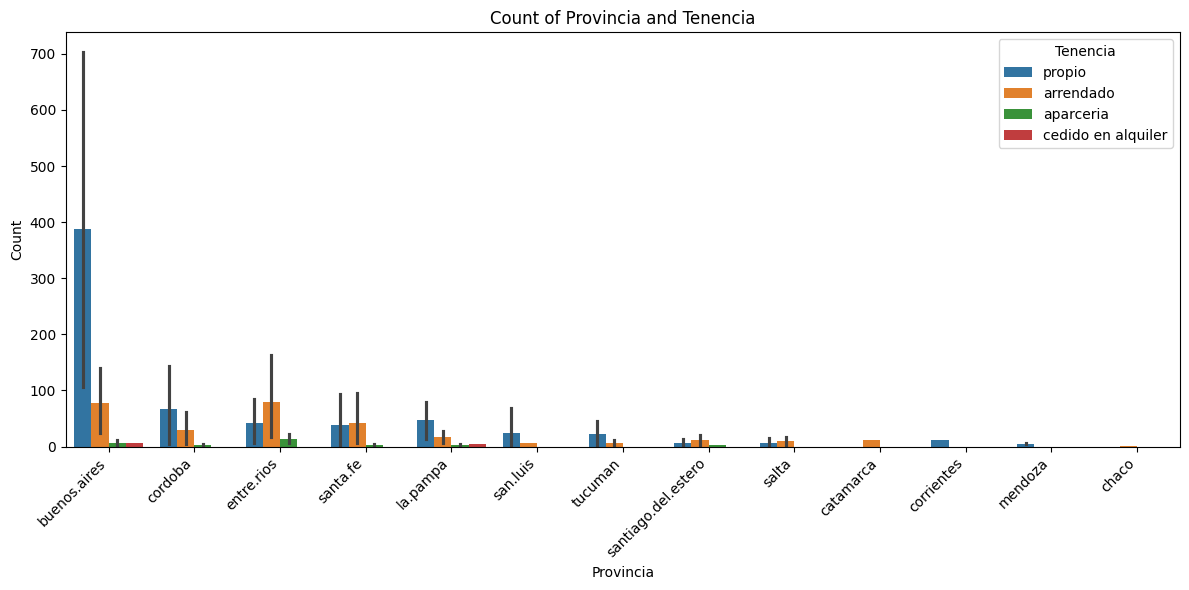

In [588]:
tenencia_prov = n_df.groupby(["provincia", "tenencia"])["id"].count()
tenencia_prov = tenencia_prov.reset_index().sort_values("id", ascending  = False)
tenencia_prov = cultivo_ten_prov.reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='provincia', y='cuenta', hue='tenencia', data=tenencia_prov)

# Set labels and title
plt.xlabel('Provincia')
plt.ylabel('Count')
plt.title('Count of Provincia and Tenencia')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show legend
plt.legend(title='Tenencia')

# Show plot
plt.tight_layout()
plt.show()

C:\Users\agustin\AppData\Local\Temp\ipykernel_30456\1485627579.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  cultivo_prov_t5 = cultivo_prov_sorted.groupby("provincia").apply(top_5_by_province)


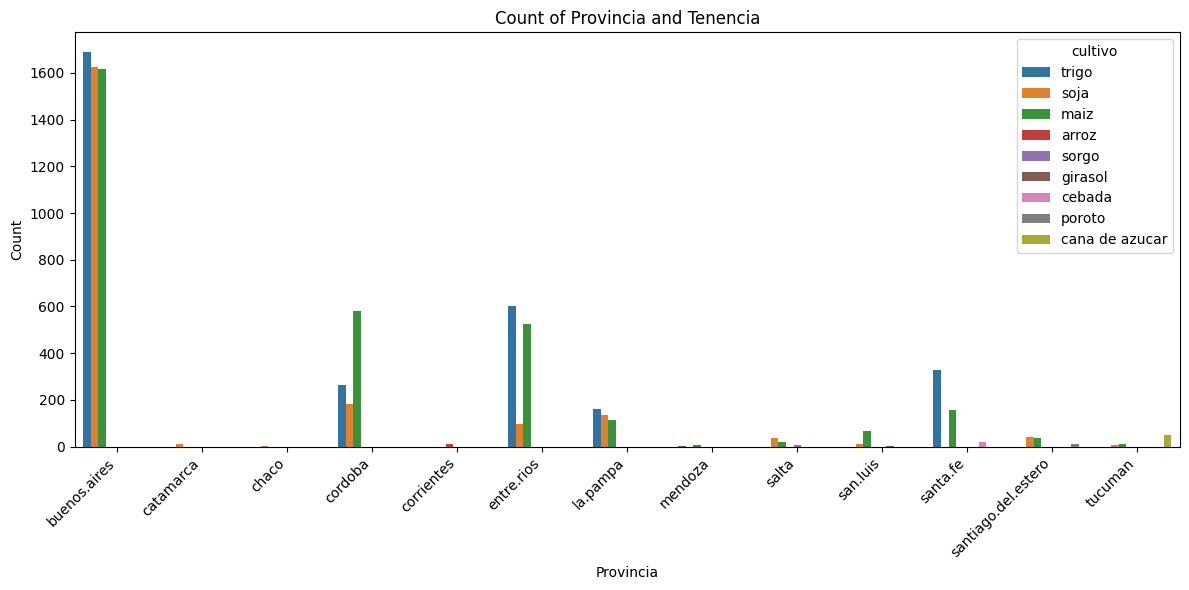

In [589]:
cultivo_prov = n_df.groupby(["provincia", "cultivo"])["id"].count()
cultivo_prov_sorted = cultivo_prov.reset_index().sort_values(["provincia", "id"], ascending  = False)

#renombrar el id

def top_5_by_province(df):
    return df.groupby("provincia").head(3)

cultivo_prov_t5 = cultivo_prov_sorted.groupby("provincia").apply(top_5_by_province)

cultivo_prov_t5.reset_index(drop=True, inplace=True)

plt.figure(figsize=(12, 6))
sns.barplot(x='provincia', y='id', hue='cultivo', data=cultivo_prov_t5)

# Set labels and title
plt.xlabel('Provincia')
plt.ylabel('Count')
plt.title('Count of Provincia and Tenencia')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show legend
plt.legend(title='cultivo')

# Show plot
plt.tight_layout()
plt.show()

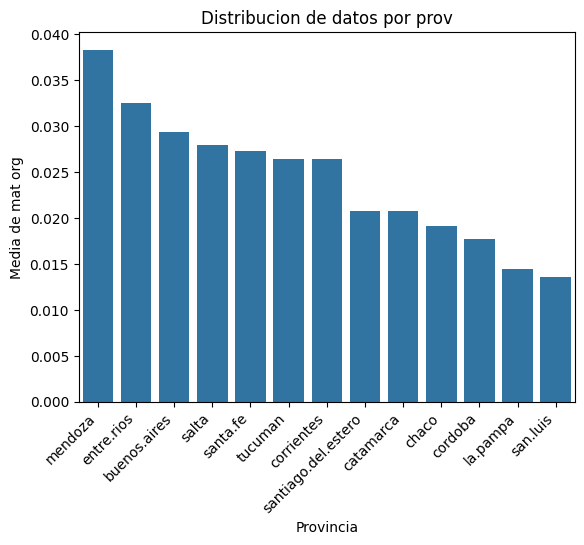

In [590]:
mat_org_prov = n_df.groupby(["provincia"])["materia_organica_porc"].mean()
mat_org_prov = mat_org_prov.reset_index().sort_values("materia_organica_porc", ascending  = False)
mat_org_prov

plt.xticks(rotation=45, ha='right')  

sns.barplot(x="provincia", y="materia_organica_porc", data = mat_org_prov)

# Add labels and title
plt.xlabel('Provincia')
plt.ylabel('Media de mat org')
plt.title('Distribucion de datos por prov')

# Show plot
plt.show()

In [591]:
cor = n_df.select_dtypes(include='number').corr()
cor["materia_organica_porc"]

id                          -0.074388
Casos                       -0.168083
sup_sembrada                -0.010526
sup_cosechada               -0.005037
rendimiento_sup_cosechada   -0.050737
produccion                  -0.078692
densidad_sem_m2              0.009265
densidad_kg_ha               0.298402
poblacion_pl_ha              0.143697
distancia_hileras           -0.129150
arena                       -0.499380
limo                         0.500973
arcilla                      0.154928
materia_organica_porc        1.000000
ph                          -0.116265
azufre_ppm                  -0.045790
fosforo_0_20                -0.090204
nitrogeno_no3_0_20          -0.046114
nitrogeno_no3_20_40         -0.086129
nitrogeno_no3_40_60         -0.079382
pp_campana                   0.023213
duracion_campaña             0.066417
Name: materia_organica_porc, dtype: float64

In [592]:
# perfil provincia
    # hay que usar todos los datos para esto porque sino puede estar re sesgada la muestra
    

In [593]:
sup_semb_prov = n_df.groupby(["provincia"])["sup_sembrada"].mean()
sup_semb_prov = sup_semb_prov.reset_index().sort_values("sup_sembrada", ascending  = False)


sup_cos_prov = n_df.groupby(["provincia"])["sup_cosechada"].mean()
sup_cos_prov = sup_cos_prov.reset_index().sort_values("sup_cosechada", ascending  = False)

rend_sup_cos_prov = n_df.groupby(["provincia"])["rendimiento_sup_cosechada"].mean()
rend_sup_cos_prov = rend_sup_cos_prov.reset_index().sort_values("rendimiento_sup_cosechada", ascending  = False)


# agregarle tambien el desvio?

In [594]:

combined_stats = sup_semb_prov.merge(sup_cos_prov, on="provincia").merge(rend_sup_cos_prov, on="provincia")

combined_stats.rename(columns={
    "sup_sembrada": "Superficie Sembrada (ha)",
    "sup_cosechada": "Superficie Cosechada (ha)",
    "rendimiento_sup_cosechada": "Rendimiento por Superficie Cosechada (kg/ha)"
}, inplace=True)

combined_stats



,provincia,Superficie Sembrada (ha),Superficie Cosechada (ha),Rendimiento por Superficie Cosechada (kg/ha)
0,salta,180.255077,180.255077,4507.538462
1,chaco,122.000000,122.000000,3177.049180
2,entre.rios,96.781210,96.605369,3855.104454
3,santiago.del.estero,93.233750,92.418242,4075.138310
4,cordoba,87.808048,87.535532,7418.757095
5,san.luis,83.492436,82.947564,7475.575385
6,tucuman,70.250423,79.710719,3094.484514
7,santa.fe,59.896887,59.852376,5856.136739
8,la.pampa,53.721835,51.041056,3724.878776
9,buenos.aires,52.194113,50.672640,5697.751941


In [595]:


ph_prov = n_df.groupby(["provincia"])["ph"].mean()
ph_prov = ph_prov.reset_index().sort_values("ph", ascending  = False)


fos_prov = n_df.groupby(["provincia"])["fosforo_0_20"].mean()
fos_prov = fos_prov.reset_index().sort_values("fosforo_0_20", ascending  = False)

nit_prov = n_df.groupby(["provincia"])["nitrogeno_no3_0_20"].mean()
nit_prov = nit_prov.reset_index().sort_values("nitrogeno_no3_0_20", ascending  = False)

In [596]:


combined_stats = ph_prov.merge(fos_prov, on="provincia").merge(nit_prov, on="provincia")

combined_stats.rename(columns={
    "ph": "ph promedio",
    "fosforo_0_20": "fosforo prom",
    "nitrogeno_no3_0_20": "nitrogeno prom"
}, inplace=True)

combined_stats



,provincia,ph promedio,fosforo prom,nitrogeno prom
0,salta,7.001970,21.166214,NaN
1,catamarca,6.900000,NaN,NaN
2,santiago.del.estero,6.678174,34.093924,16.653030
3,tucuman,6.671176,36.571875,11.119557
4,san.luis,6.649051,30.261667,14.528983
5,mendoza,6.636364,8.100000,9.892555
6,cordoba,6.357159,20.675491,12.697145
7,la.pampa,6.347071,13.335087,9.302020
8,entre.rios,6.324313,12.257087,13.706053
9,buenos.aires,6.231668,13.268496,13.180768


In [597]:
rendimiento_por_riego = n_df.groupby('riego')['rendimiento_sup_cosechada'].mean()

rendimiento_por_riego.reset_index()

,riego,rendimiento_sup_cosechada
0,no,5460.140655
1,si,7072.418427


Correlación entre rendimiento y materia orgánica: -0.050736564760784995


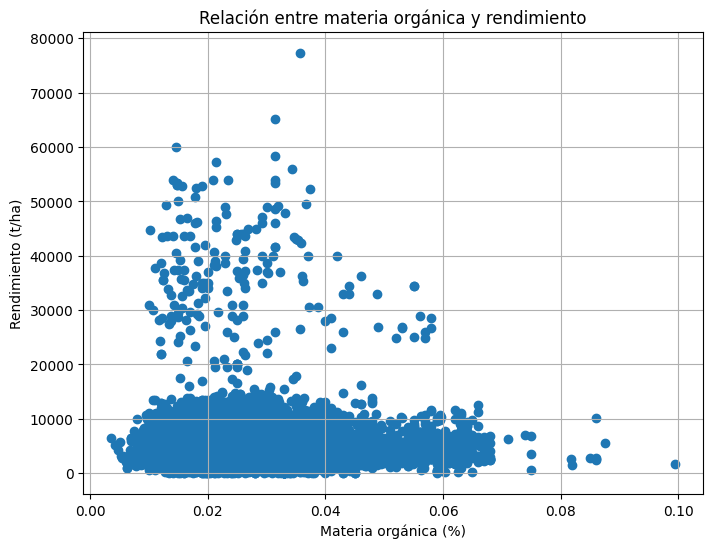

In [598]:
correlacion_rendimiento_mat_org = n_df['rendimiento_sup_cosechada'].corr(n_df['materia_organica_porc'])
correlacion_rendimiento_mat_org


# Print the correlation coefficient
print("Correlación entre rendimiento y materia orgánica:", correlacion_rendimiento_mat_org)

# Create the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(n_df['materia_organica_porc'], n_df['rendimiento_sup_cosechada'])
plt.xlabel('Materia orgánica (%)')
plt.ylabel('Rendimiento (t/ha)')
plt.title('Relación entre materia orgánica y rendimiento')
plt.grid(True)

# Show the scatter plot
plt.show()


In [599]:
distribucion_mat_org_por_version_bio = n_df.groupby('version_biotecnologica')['materia_organica_porc'].count().reset_index()
distribucion_mat_org_por_version_bio.sort_values("materia_organica_porc", ascending =  False).head(10)

,version_biotecnologica,materia_organica_porc
1,no bt,5872
0,No aplica,4028


In [600]:
distribucion_mat_org_por_version_bio = n_df.groupby('version_biotecnologica')['materia_organica_porc'].mean().reset_index()
distribucion_mat_org_por_version_bio.sort_values("materia_organica_porc", ascending =  False).head(10)

#enteder q significa

,version_biotecnologica,materia_organica_porc
0,No aplica,0.030568
1,no bt,0.025314


In [601]:
numero_empresas_version_bio = n_df['version_biotecnologica'].nunique()
numero_empresas_version_bio

2

In [602]:
explicacion_genetica = n_df.groupby('genetica')['rendimiento_sup_cosechada'].mean().reset_index()
explicacion_genetica.sort_values("rendimiento_sup_cosechada", ascending = False)

,genetica,rendimiento_sup_cosechada
401,pan 5175,52730.000000
370,p 1804,49316.000000
229,duo 30,49165.000000
265,km 4480,42940.000000
358,ns z8,38302.909091
...,...,...
438,srm 553,NaN
467,syn 848,NaN
472,syn 960,NaN
482,tuc 00-19,NaN


In [603]:
relacion_biotecnologia_rendimiento = n_df.groupby('version_biotecnologica')['rendimiento_sup_cosechada'].mean().reset_index()
relacion_biotecnologia_rendimiento.sort_values("rendimiento_sup_cosechada", ascending = False).head(10)

,version_biotecnologica,rendimiento_sup_cosechada
1,no bt,6453.093708
0,No aplica,4142.117935


In [604]:
distribucion_fecha_cosecha = n_df['fecha_cosecha'].value_counts().reset_index()
distribucion_fecha_siembra = n_df['fecha_siembra'].value_counts().reset_index()
distribucion_fecha_cosecha
distribucion_fecha_siembra

,fecha_siembra,count
0,2022-06-01,48
1,2021-06-04,40
2,2019-06-10,38
3,2020-06-12,34
4,2022-06-02,33
...,...,...
1974,2011-10-11,1
1975,2011-09-15,1
1976,2011-10-15,1
1977,2011-10-13,1


In [605]:
afectacion_resiembra_mat_org = n_df.groupby('resiembra')['materia_organica_porc'].mean().reset_index()
afectacion_resiembra_mat_org.sort_values("materia_organica_porc", ascending = False).head(10)


,resiembra,materia_organica_porc
1,si,0.029698
0,no,0.027425


In [606]:
relacion_resiembra_riego = n_df.groupby('riego')['resiembra'].value_counts().reset_index()
relacion_resiembra_riego.sort_values("resiembra", ascending = False).head(10)

,riego,resiembra,count
1,no,si,114
3,si,si,1
0,no,no,9497
2,si,no,281


In [608]:
n_df.columns

Index(['id', 'Casos', 'extra_crea', 'provincia', 'departamento', 'localidad',
       'establecimiento', 'lote', 'tenencia', 'cultivo', 'subgrupo',
       'primera_segunda', 'temprano_tardio', 'sup_sembrada', 'sup_cosechada',
       'destino', 'rendimiento_sup_cosechada', 'produccion', 'antecesor',
       'semillero', 'genetica', 'version_biotecnologica', 'ciclo',
       'fecha_siembra', 'decanato_fecha_siembra', 'densidad_sem_m2',
       'densidad_kg_ha', 'poblacion_pl_ha', 'distancia_hileras',
       'sistema_siembra', 'sistema_labranza', 'resiembra', 'fecha_cosecha',
       'influencia_napa', 'riego', 'calidad_ambiente',
       'clasificacion_ambiente_regional', 'capacidad_uso', 'sistematizado',
       'ambiente_salino', 'arena', 'limo', 'arcilla', 'materia_organica_porc',
       'ph', 'azufre_ppm', 'fosforo_0_20', 'nitrogeno_no3_0_20',
       'nitrogeno_no3_20_40', 'nitrogeno_no3_40_60', 'pp_campana',
       'fertilizacion', 'duracion_campaña'],
      dtype='object')

Correlación entre presipitaciones y materia orgánica: 0.023212968909543937


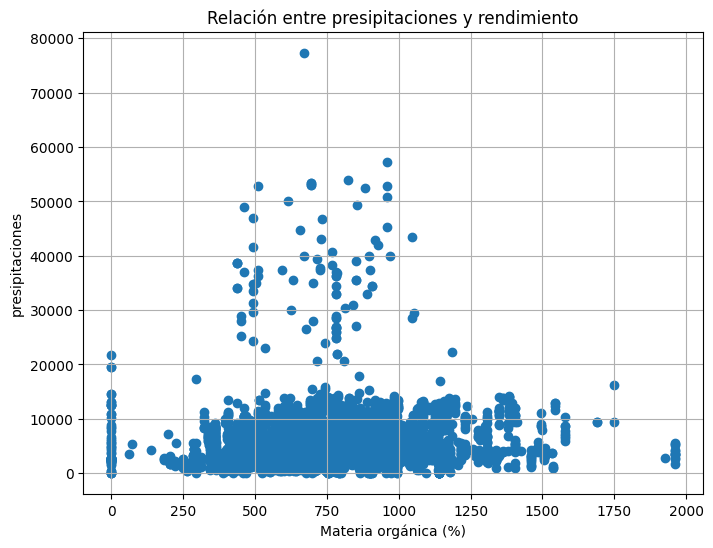

In [609]:
corr_pp_mat_org = n_df['pp_campana'].corr(n_df['materia_organica_porc'])
corr_pp_mat_org


# Print the correlation coefficient
print("Correlación entre presipitaciones y materia orgánica:", corr_pp_mat_org)

# Create the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(n_df['pp_campana'], n_df['rendimiento_sup_cosechada'])
plt.xlabel('Materia orgánica (%)')
plt.ylabel('presipitaciones')
plt.title('Relación entre presipitaciones y rendimiento')
plt.grid(True)

# Show the scatter plot
plt.show()